# Find values that meet a condition or threshold

This notebook explores how to find values in a numpy array that meet a condition, for example, meeting a threshold condition.

## A small example

Start with a numpy array that contains a set of measurements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from phonlab.array import nonzero_groups
%matplotlib inline

a = np.array([0,1,2,3,2,1,0], dtype=int)
print(a)

[0 1 2 3 2 1 0]


Next plot the values with filled circles. A horizontal line separates values above and below the threshold.

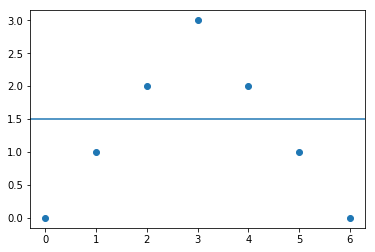

In [2]:
thresh = 1.5
fig, ax = plt.subplots()
ax.plot(a, 'o');
ax.axhline(y=thresh);

The values at indexes [0, 1, 5, 6] lie below the threshold, and [2, 3, 4] are above. We can find each set of values with integer indexing and boolean indexing.

### Find threshold values with boolean indexing

A simple comparison creates a boolean index for values that are greater than the threshold. Negating that index returns True for elements that are less than or equal to the threshold.

In [3]:
gtbool = a > thresh
ltbool = ~gtbool      # OR: `ltbool = a <= thresh`
print('Above threshold: ', gtbool)
print('Below threshold: ', ltbool)

Above threshold:  [False False  True  True  True False False]
Below threshold:  [ True  True False False False  True  True]


You can use the boolean index to select elements from the array, to make a plot of values above the threshold, for instance.

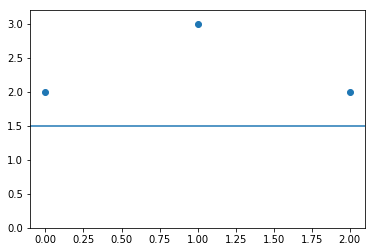

In [4]:
plt.plot(a[gtbool], 'o')
plt.ylim([0, 3.2])
plt.axhline(y=thresh);

In Pandas you can also assign the boolean index to a dataframe column for later querying.

In [5]:
df = pd.DataFrame({'meas': a})
df['is_gt'] = df['meas'] > thresh   # Add the boolean index column 'is_gt'
df

,meas,is_gt
0,0,False
1,1,False
2,2,True
3,3,True
4,2,True
5,1,False
6,0,False


### Find the indexes of the threshold values

Sometimes you need to know the indexes where the condition is met. This can be useful for including the X axis when plotting, for instance.

The `np.nonzero()` function returns the indexes of an array that have nonzero values, which are `True` values for a boolean array. We use it with our condition to find the indexes of values above and below the threshold. `np.nonzero()` returns a tuple of arrays corresponding to the dimensions of the input array, and since our input is 1D we only need the first element of that tuple.

In [6]:
ltidx = (a <= thresh).nonzero()[0]   # [0] for first element of the tuple
gtidx = (a > thresh).nonzero()[0]
print(ltidx, gtidx)

[0 1 5 6] [2 3 4]


We plot the values on each side of the threshold separately, and the indexes returned by `np.nonzero()` help us plot correctly along the x-axis.

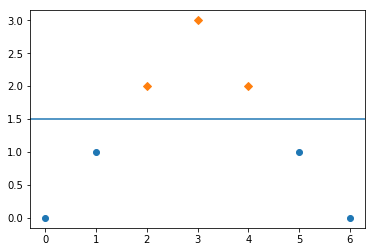

In [7]:
fig, ax = plt.subplots()
ax.plot(ltidx, a[ltidx], 'o');
ax.plot(gtidx, a[gtidx], 'D');
ax.axhline(y=thresh);

## Finding groups (runs) of values that meet the threshold

Let's look at a slightly longer array with a duplicate of `a` at a larger magnitude and with two extra values added to the ends. Our goal is to find the groups of consecutive values that meet the threshold condition.

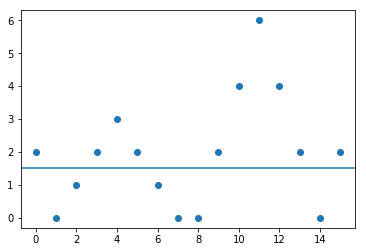

In [8]:
aa = np.hstack([2, a, a * 2, 2])
fig, ax = plt.subplots()
ax.plot(aa, 'o')
ax.axhline(thresh);

We select the indexes of values greater than the threshold and plot them separately. Notice that there are four separate regions along the X axis where values are greater than the threshold. These regions are indexes `[0]`, `[3, 4, 5]`, `[9, 10, 11, 12, 13]`, `[15]`.

Below threshold:  [ 1  2  6  7  8 14]
Above threshold:  [ 0  3  4  5  9 10 11 12 13 15]


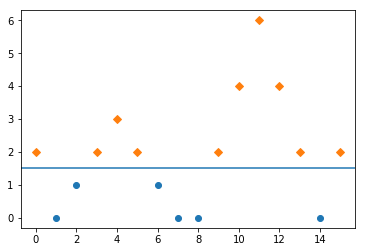

In [9]:
ltidx = (aa <= thresh).nonzero()[0]
gtidx = (aa > thresh).nonzero()[0]
print('Below threshold: ', ltidx)
print('Above threshold: ', gtidx)
fig, ax = plt.subplots()
ax.plot(ltidx, aa[ltidx], 'o');
ax.plot(gtidx, aa[gtidx], 'D');
ax.axhline(y=thresh);

The indexes of the values above the threshold are contained in `gtidx`, but they are not grouped. The `nonzero_groups` function (from `phonlab.utils`, not numpy!) returns the same indexes as `nonzero` does and additionally groups the indexes into consecutive sets.

In [10]:
nonzero_groups(aa > thresh)

(array([0]), array([3, 4, 5]), array([ 9, 10, 11, 12, 13]), array([15]))

Compare with the flattened result in `gtidx`.

In [11]:
gtidx

array([ 0,  3,  4,  5,  9, 10, 11, 12, 13, 15])

`nonzero_groups` also includes parameters for filtering the groups in the result. The `minlen` parameter filters out groups with fewer than a minimum number of elements. For example, if `minlen` is `3` then only groups with at least three elements are returned.

In [12]:
nonzero_groups(aa > thresh, minlen=3)

(array([3, 4, 5]), array([ 9, 10, 11, 12, 13]))

Sometimes you might want to retrieve one or more groups of elements that include one or more specific elements. For example, you might be interested in the highest value in an array and want to retrieve the consecutive group of values above a threshold that includes that value. The `include_any` parameter is used to provide one or more indexes that a group must include in order to be included in the result. Groups that include any index provided by `include_any` are part of the result set, and those that don't have at least one of the indexes provided by `include_any` are excluded.

In [13]:
maxidx = aa.argmax()
print(f'Index of max value: {maxidx}')
nonzero_groups(aa > thresh, include_any=maxidx)

Index of max value: 11


(array([ 9, 10, 11, 12, 13]),)

`include_any` can also provide a list of indexes.

In [14]:
nonzero_groups(aa > thresh, include_any=[0, 5, 12])

(array([0]), array([3, 4, 5]), array([ 9, 10, 11, 12, 13]))